In [4]:
import sys
sys.path.insert(0,'..')
from llmdh.story_llms import *
import networkx as nx

In [5]:
db=NovelRelationshipsLLM.get_db(flag='r')
keys=list(db.keys())
k=random.choice(keys)
len(keys), k

(415, 'chadwyck.Lytton.Pelham_Or_The_Adventures.1106.txt')

In [7]:
for k in tqdm(keys,position=0):
    llm = NovelRelationshipsLLM(k)
    if llm.graph().order()>=5:
        llm.plot_network()

 55%|█████▍    | 227/415 [01:17<01:10,  2.66it/s]

In [3]:
# k='chadwyck.Edgeworth.Ennui_or_Memoirs_of_the_E.1114.txt'

In [4]:
llm = NovelRelationshipsLLM(filename=k)
nx.number_connected_components(llm.graph())

1

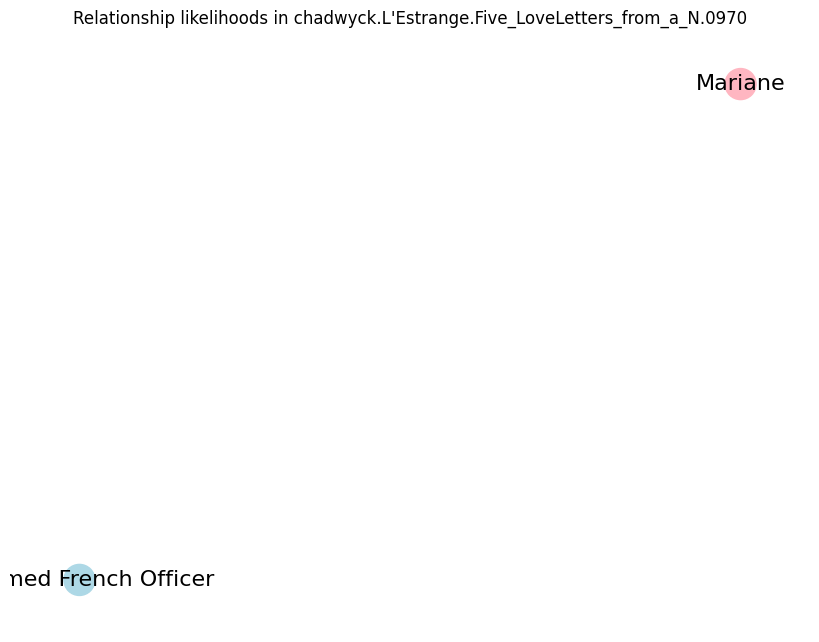

In [5]:
llm.plot_network()

In [6]:
# NovelRelationshipsLLM.canon_filenames

In [7]:
ld=[
    {
        'id':os.path.splitext(k)[0], 
        'num_relationships':len(db[k][-1]['result']), 
        'num_components':nx.number_connected_components(
            NovelRelationshipsLLM(filename=k).graph()
        ),
        **d
    } 
    for k in db for d in db[k][-1]['result']
]
df=pd.DataFrame(ld)
for k in ['relationship_at_start','relationship_by_end','relationship_happened','relationship_likelihood','relationship_is_marriage','relationship_ended']:
    df[k]=pd.to_numeric(df[k], errors='coerce')
df

,id,num_relationships,num_components,character1_name,character2_name,character1_gender,character2_gender,character1_class,character2_class,character1_income,character2_income,character1_desc,character2_desc,relationship_at_start,relationship_happened,relationship_by_end,relationship_likelihood,relationship_is_marriage,relationship_ended,relationship_ended_reason,relationship_summary,romantic_relationships,sexual_content,relationships,text,text_type,century,themes,preface,analysis,novel_characteristics,romantic_themes,error
0,chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192,7,3,Dorothea Brooke,Edward Casaubon,Female,Male,Gentry,Gentry,£700,"Unspecified, but described as 'wealthy'",Dorothea is a young woman of great intellectua...,Mr Casaubon is a middle-aged clergyman and sch...,0.0,1.0,0.0,10.0,1.0,1.0,Death of Edward Casaubon,Dorothea is immediately drawn to Casaubon's in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192,7,3,Dorothea Brooke,Will Ladislaw,Female,Male,Gentry,Gentry (but of uncertain financial status),"£700 + £1,900 (inherited from Casaubon)","Dependent on others, specifically Casaubon",Same as above,Will is a young man of artistic temperament an...,0.0,1.0,1.0,2.0,1.0,0.0,,Dorothea and Will share an immediate intellect...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192,7,3,Celia Brooke,Sir James Chettam,Female,Male,Gentry,Baronet,£700,"Unspecified, but assumed to be substantial giv...","Celia is Dorothea's younger sister, more conve...","Sir James is a kind, well-intentioned, but som...",0.0,1.0,1.0,9.0,1.0,0.0,,Celia and Sir James initially bond over their ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192,7,3,Rosamond Vincy,Tertius Lydgate,Female,Male,Upper middle class (daughter of a wealthy manu...,Professional (physician),"No personal income, but comes from a wealthy f...","Initially promising, but declines due to vario...","Rosamond is a beautiful, accomplished, and amb...","Lydgate is a talented, ambitious physician wit...",0.0,1.0,0.0,8.0,1.0,1.0,Death of Tertius Lydgate,Rosamond is attracted to Lydgate's talent and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192,7,3,Rosamond Vincy,Will Ladislaw,Female,Male,Upper middle class (daughter of a wealthy manu...,Gentry (but of uncertain financial status),"No personal income, but comes from a wealthy f...","Dependent on others, specifically Casaubon",Same as above,Same as above,0.0,0.0,0.0,5.0,0.0,0.0,,Rosamond finds Will's charm and attention flat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,chadwyck.Holcroft.The_Adventures_of_Hugh_Tr.1128,9,2,Lydia Wilmot,Mr. Wakefield (alias Belmont),Female,Male,middle gentry,middle class,Unknown,Unknown,Lydia is a gentle and kind-hearted woman who h...,"Mr. Wakefield is a cunning, manipulative, and ...",0.0,1.0,1.0,3.0,1.0,0.0,,"Lydia is seduced and abandoned by Wakefield, l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,chadwyck.Holcroft.The_Adventures_of_Hugh_Tr.1128,9,2,Olivia Mowbray,Hector Mowbray,Female,Male,landed gentry,landed gentry,"Unknown, but large",Inherits a large fortune,"Olivia is a beautiful, compassionate, and inte...",Hector is Olivia's brother. He is described as...,0.0,0.0,0.0,0.0,0.0,0.0,,Olivia and Hector are siblings with opposing p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,chadwyck.Holcroft.The_Adventures_of_Hugh_Tr.1128,9,2,Olivia Mowbray,Tall Andrews,Female,Male,landed gentry,landed gentry,"Unknown, but large","Unknown, but likely large","Olivia is a beautiful, compassionate, and inte...",Tall Andrews is a friend of Hector. He is desc...,0.0,0.0,0.0,1.0,0.0,0.0,,Andrews is portrayed as a reckless and unsuita...,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
dfmeta=pd.read_excel('/Users/ryan/lltk_data/corpora/canon_fiction/metadata.xls').set_index('id')
dfagg=df.groupby('id').mean(numeric_only=True).sort_values('relationship_likelihood').join(dfmeta)
dfagg=dfagg[dfagg.num_relationships>=5]
dfagg=dfagg[1600<=dfagg.year]
dfagg['major_genre']=dfagg.major_genre.fillna('').apply(lambda x: x if x else 'Novel')
dfagg=dfagg.groupby('canon_genre').mean(numeric_only=True).reset_index()
dfagg

,canon_genre,num_relationships,num_components,relationship_at_start,relationship_happened,relationship_by_end,relationship_likelihood,relationship_is_marriage,relationship_ended,century,year,year_trans,author_id,dob,dod,genre_confirmed,num_words,ocr_accuracy
0,(Anti-)Jacobin nov.,10.285714,4.142857,0.124242,0.554092,0.280272,5.780787,0.670748,0.306349,NaN,1796.714286,NaN,NaN,NaN,NaN,NaN,131698.285714,0.983913
1,A. Brontë,7.500000,4.000000,0.062500,0.660714,0.473214,5.473214,0.598214,0.187500,NaN,1847.500000,NaN,NaN,NaN,NaN,NaN,122654.500000,0.988174
2,Alcott,7.000000,5.000000,0.074074,0.685185,0.444444,7.240741,0.851852,0.277778,NaN,1867.333333,NaN,NaN,NaN,NaN,NaN,79486.000000,0.978298
3,Allegorical rom.,5.000000,3.000000,0.000000,0.600000,0.600000,5.800000,0.600000,0.400000,NaN,1650.000000,NaN,NaN,NaN,NaN,NaN,46613.000000,0.918199
4,Arcadiana,9.666667,5.333333,0.150794,0.551587,0.353175,5.591270,0.527778,0.420635,NaN,1627.333333,NaN,NaN,NaN,NaN,NaN,32685.333333,0.856236
5,Aubin,9.400000,4.200000,0.084848,0.765051,0.403434,6.773333,0.649899,0.468283,NaN,1739.000000,NaN,NaN,NaN,NaN,NaN,35624.000000,0.987449
6,Austen,7.500000,2.500000,0.048611,0.577778,0.473611,6.418056,0.856944,0.180556,NaN,1815.000000,NaN,NaN,NaN,NaN,NaN,122511.333333,0.991517
7,Behn,6.666667,2.333333,0.097222,0.736111,0.319444,5.902778,0.476190,0.569444,NaN,1686.333333,NaN,NaN,NaN,NaN,NaN,49824.333333,0.966243
8,Bunyan,6.000000,5.000000,0.166667,0.833333,0.666667,7.666667,1.000000,0.166667,NaN,1684.000000,NaN,NaN,NaN,NaN,NaN,56542.000000,0.955962
9,Burney,7.750000,3.000000,0.100000,0.515476,0.415476,4.507143,0.833333,0.100000,NaN,1792.500000,NaN,NaN,NaN,NaN,NaN,296062.500000,0.980414


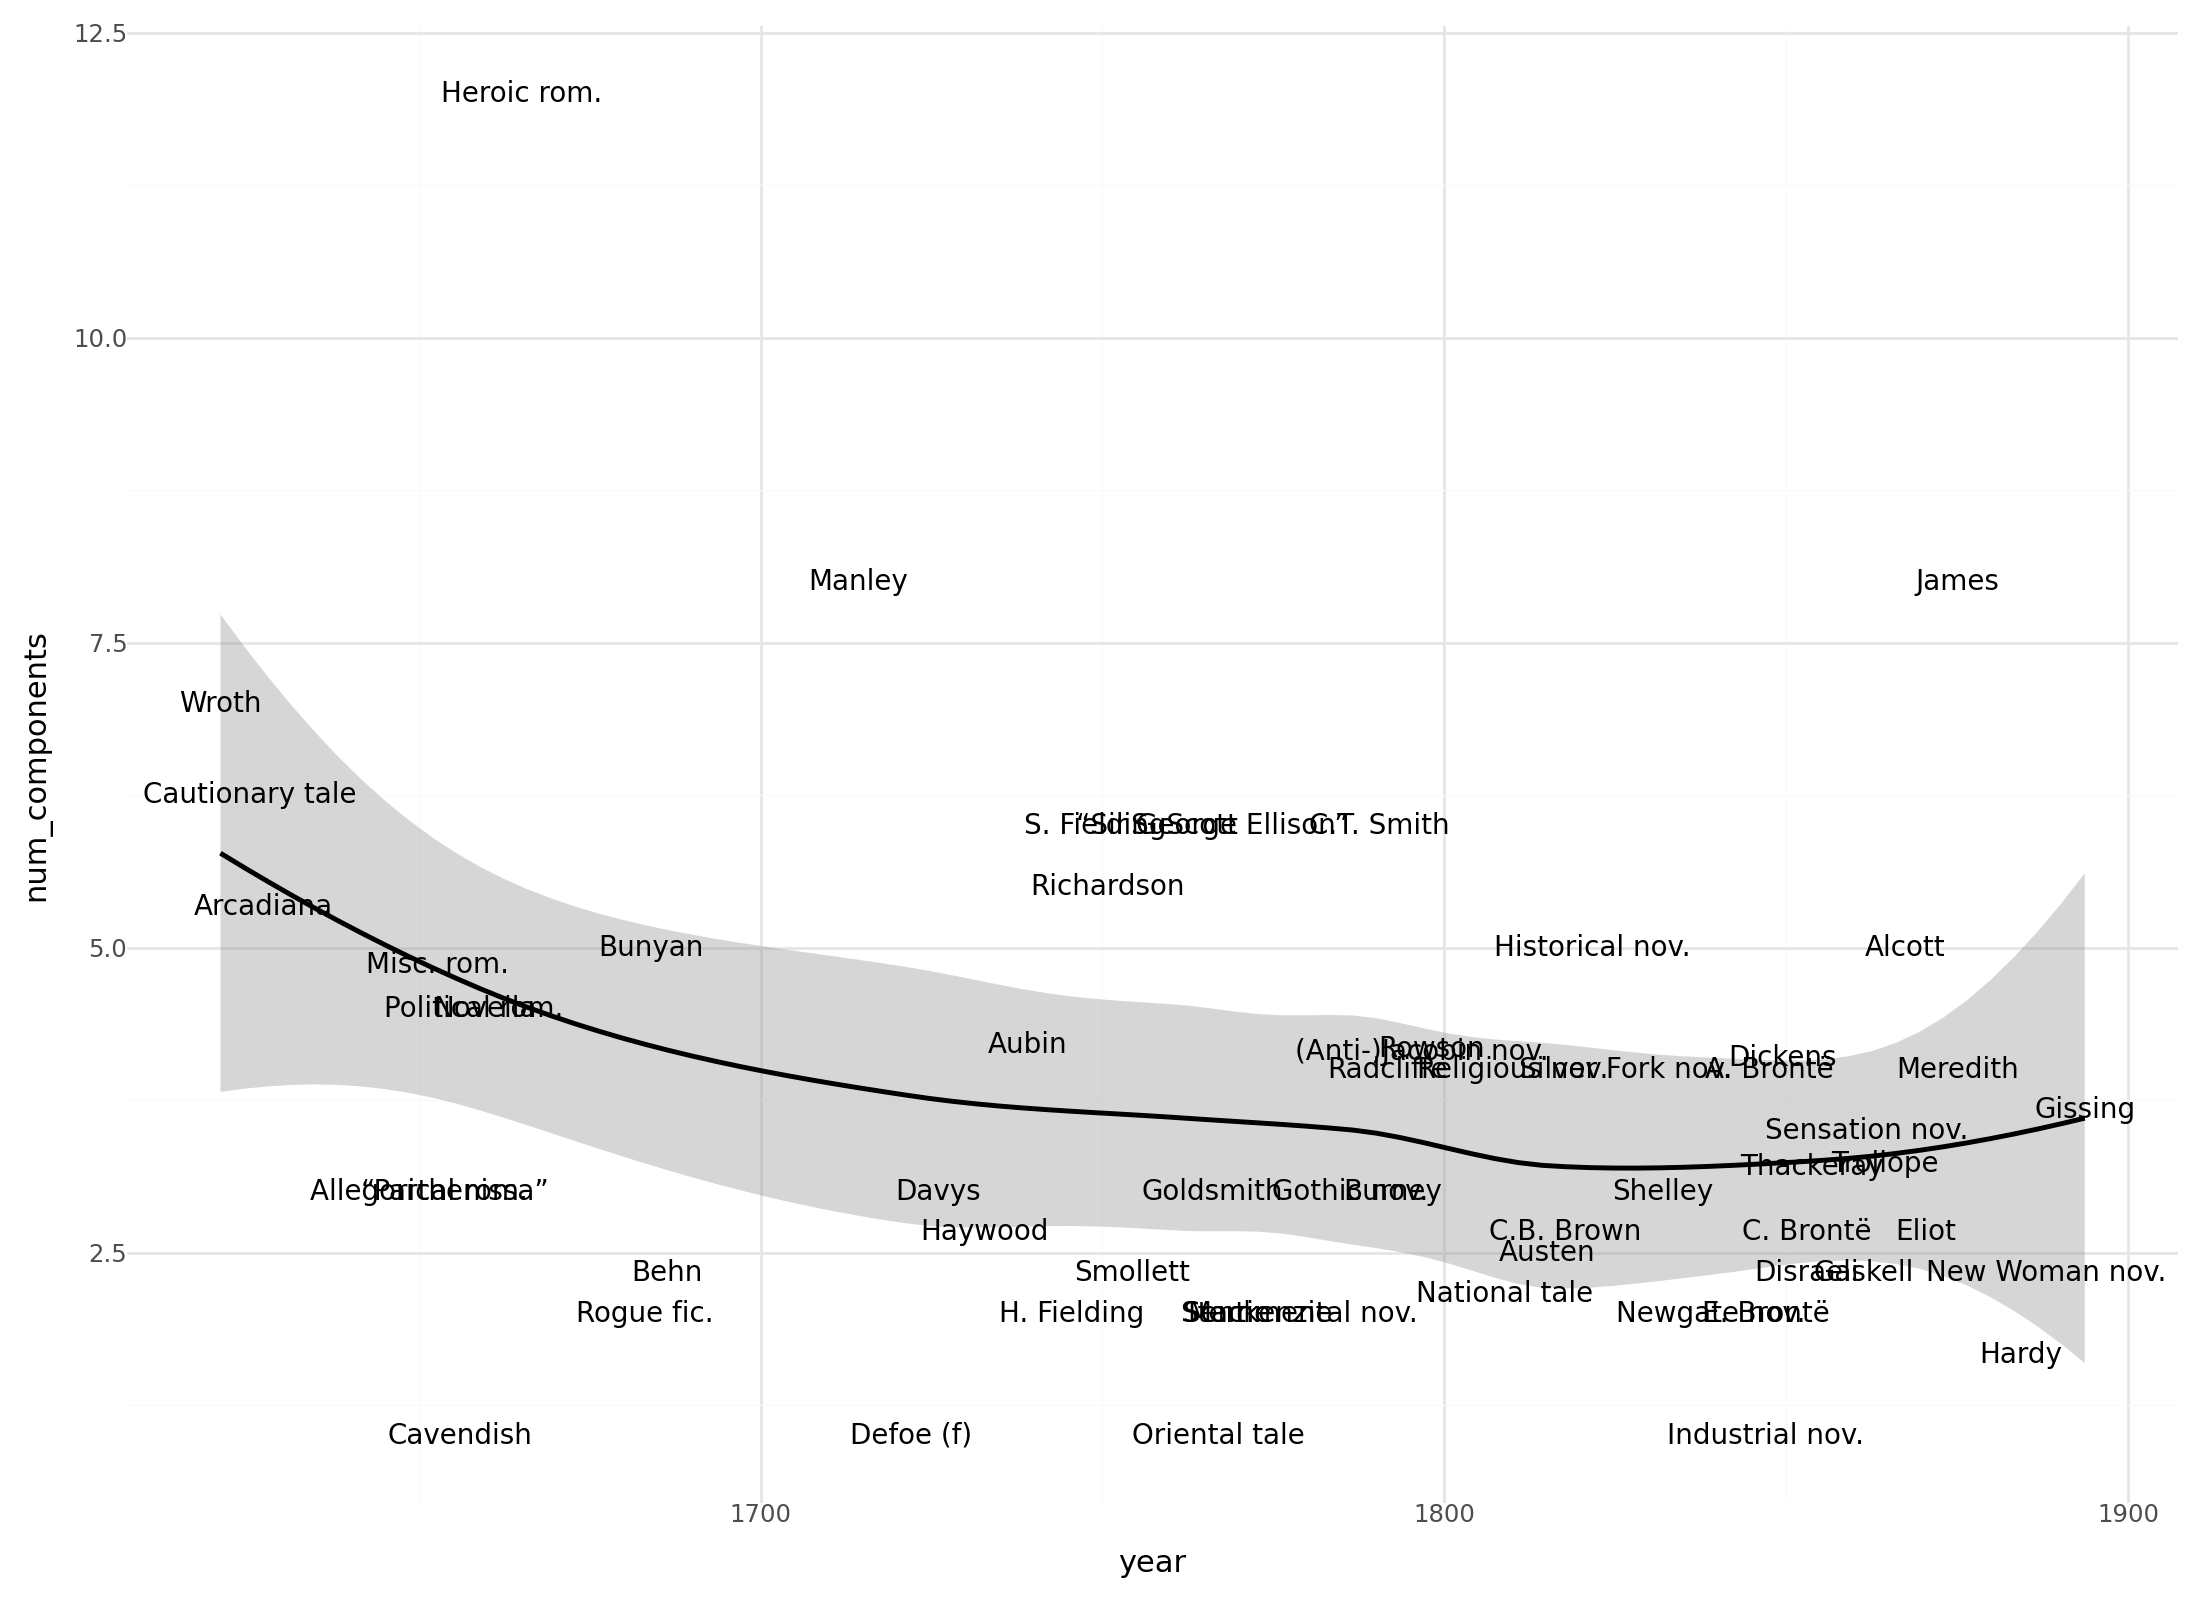

In [10]:
import plotnine as p9
p9.options.figure_size=11,8
fig=p9.ggplot(dfagg, p9.aes(x='year', y='num_components', label='canon_genre', size='num_relationships'))
# fig+=p9.geom_point(alpha=.25)
fig+=p9.geom_smooth()
fig+=p9.geom_text(size=10)
fig+=p9.theme_minimal()
fig

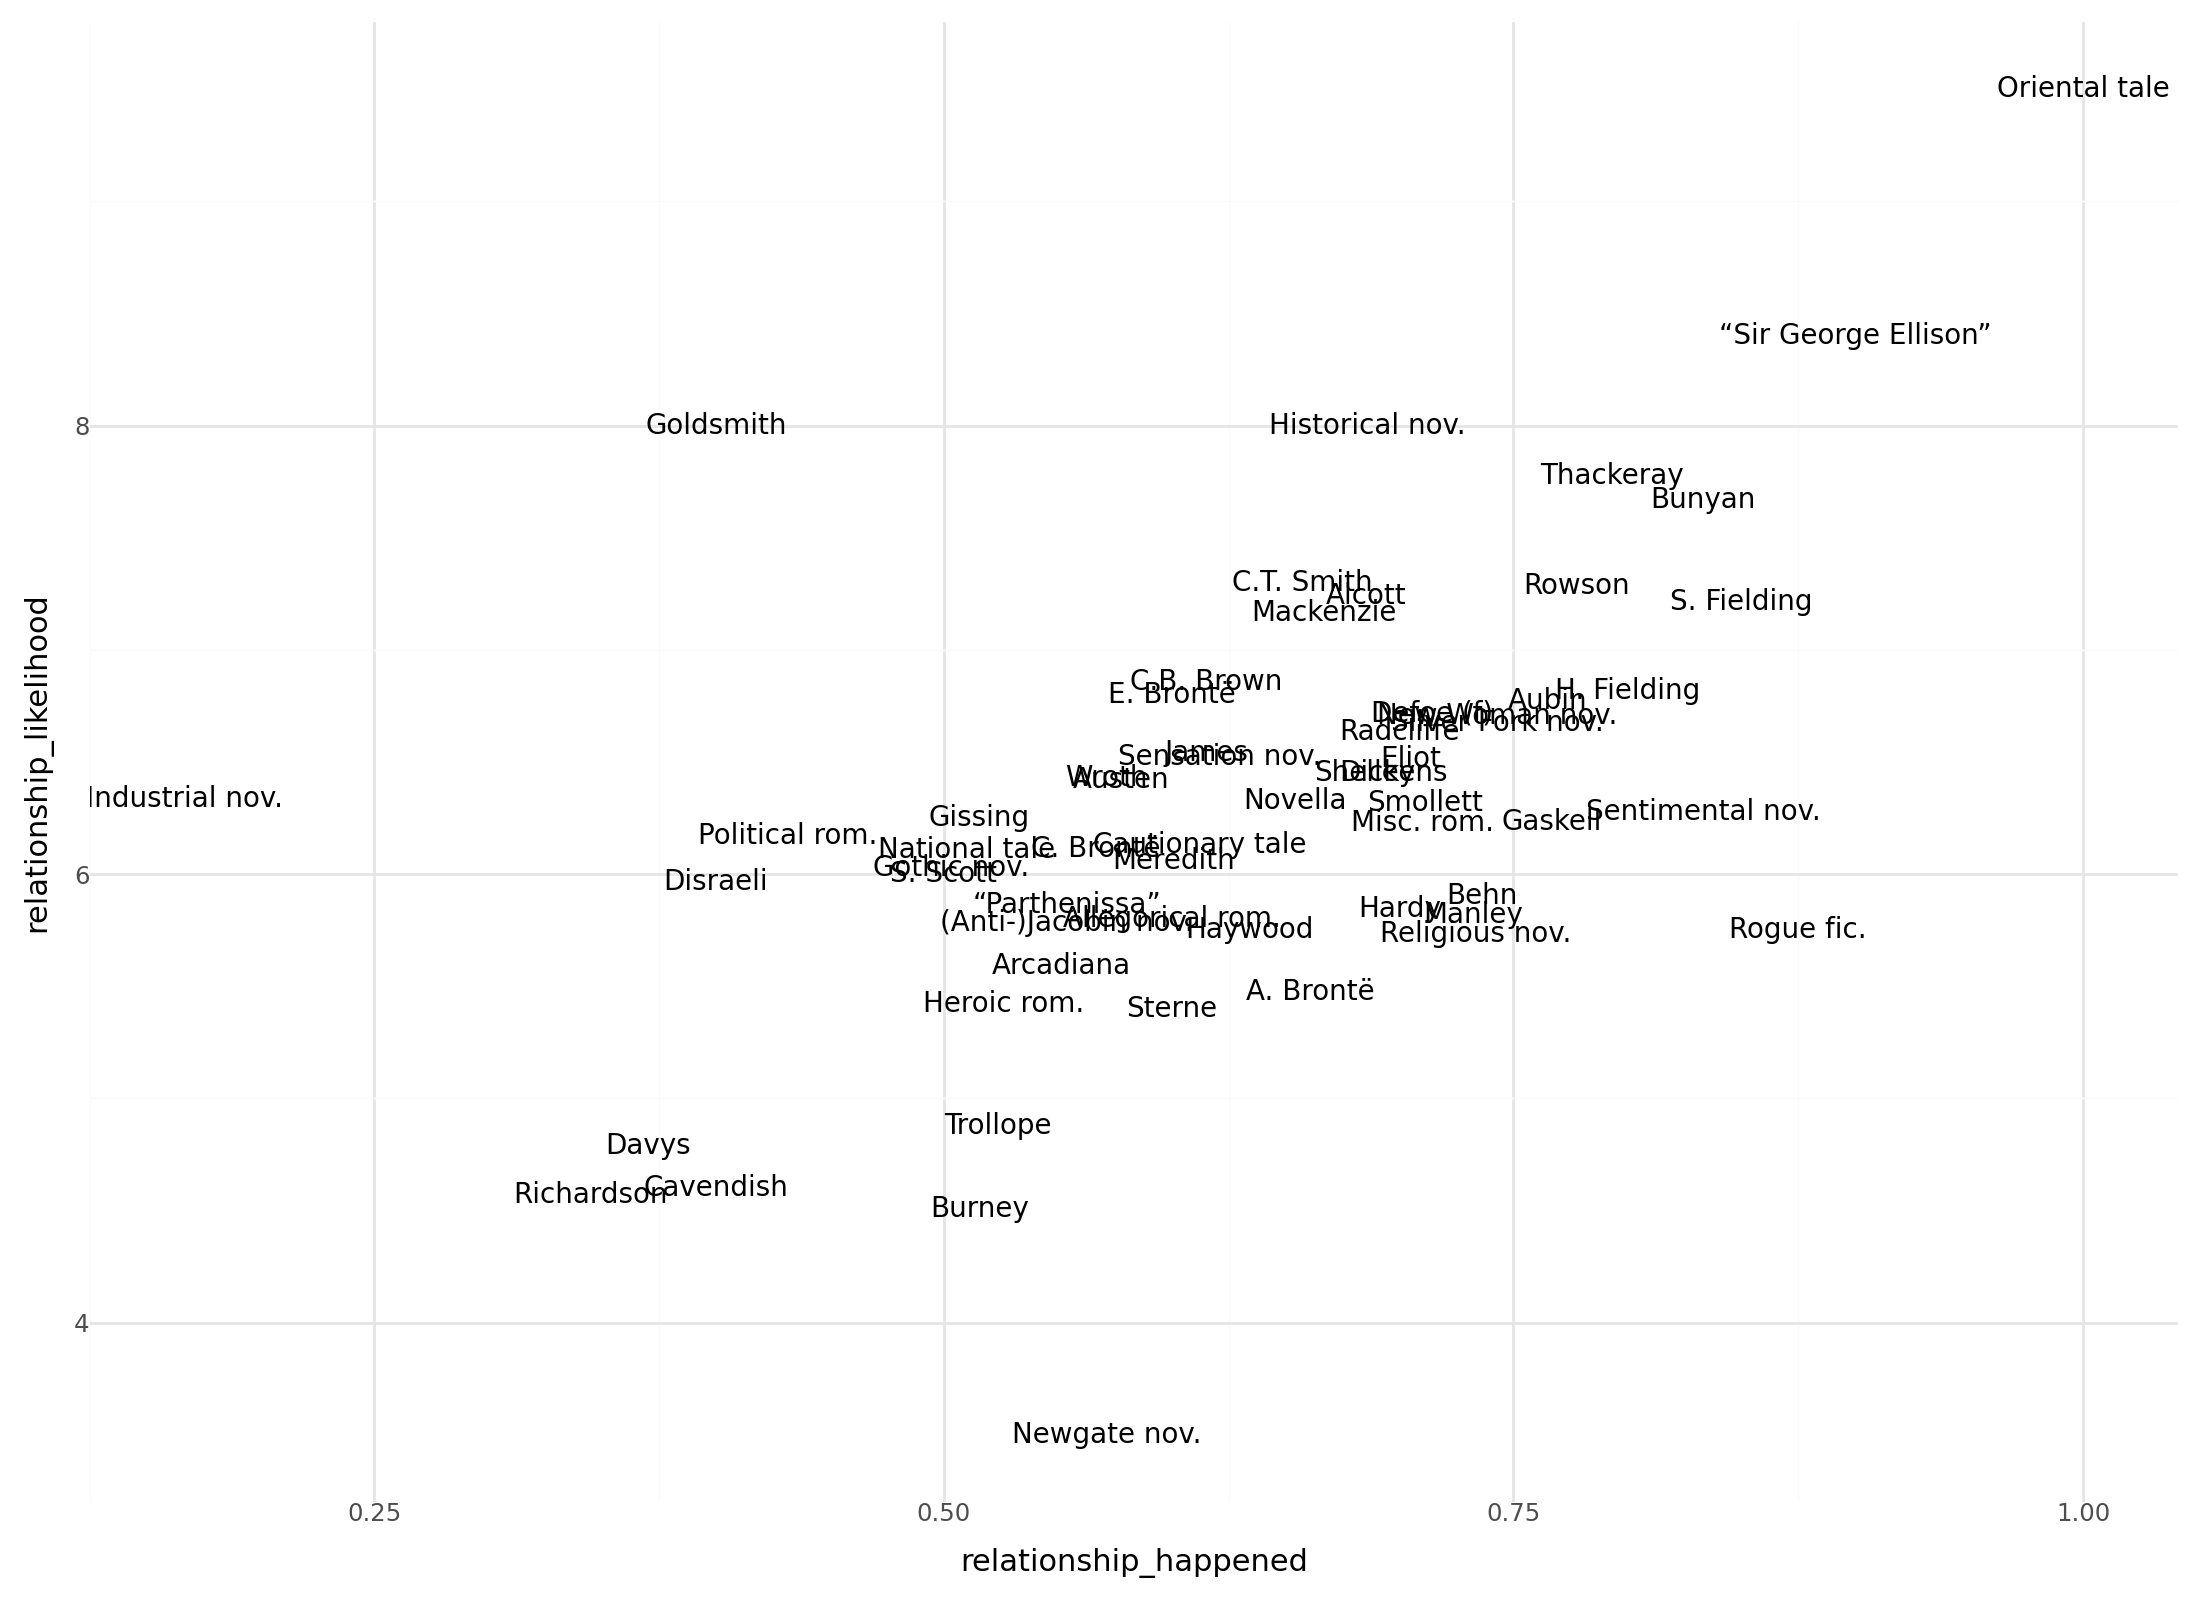

In [11]:
fig=p9.ggplot(dfagg, p9.aes(y='relationship_likelihood', x='relationship_happened', label='canon_genre', size='num_relationships'))
# fig+=p9.geom_smooth(method='lm')
fig+=p9.geom_text(size=10)
fig+=p9.theme_minimal()
fig

In [33]:
# df.merge(dfmeta,on='id').query('canon_genre=="Haggard"')

In [24]:
# keys=sorted(list(NovelRelationshipsLLM.db.keys()))
# keys

In [51]:
data=NovelRelationshipsLLM.db['chadwyck.Eliot.Middlemarch_A_Study_of_Pr.1192.txt'][-1]['result']
import networkx as nx
G=nx.Graph()
for d in data:
    for n in range(2):
        pref=f'character{n+1}_'
        name=d[pref+'name']
        if not G.has_node(name):
            nd = {
                k.replace(pref,''):d[k]
                for k in d
                if k.startswith(pref)
            }
            G.add_node(name, **nd)
    G.add_edge(
        d['character1_name'],
        d['character2_name'],
        **{k:d[k] for k in d if k.startswith('relationship_')}
    )

In [52]:
# list(G.edges(data=True))

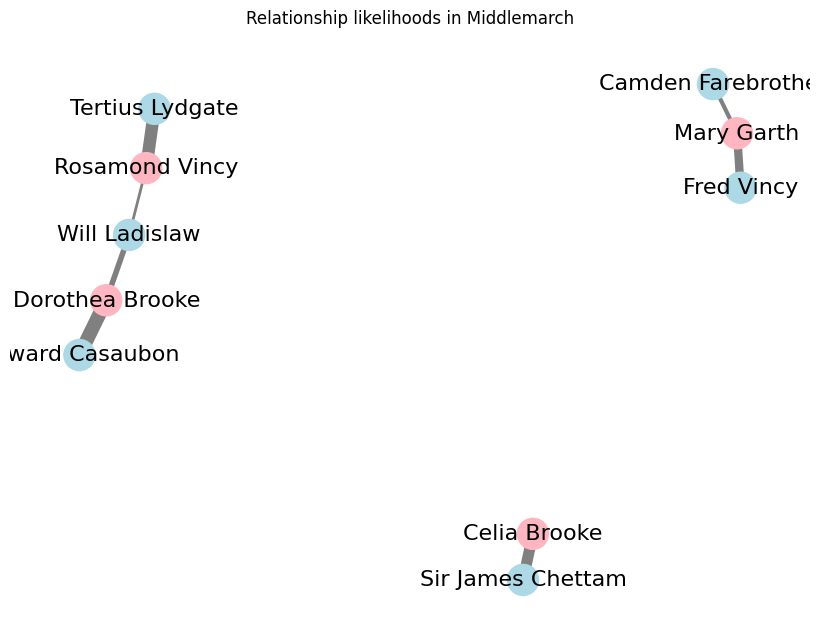

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

gender_color_map = {'Male': 'lightblue', 'Female': 'lightpink'}

# Get node colors based on gender attribute
node_colors = [gender_color_map[G.nodes[node]['gender']] for node in G.nodes]

# Get edge widths based on relationship_likelihood attribute
edge_widths = [G.edges[edge]['relationship_likelihood'] for edge in G.edges]


nx.draw(
    G, 
    with_labels=True, 
    node_color=node_colors, 
    node_size=500, 
    edge_color='gray', 
    width=edge_widths, 
    font_size=16, 
    font_color='black'
)
plt.title("Relationship likelihoods in Middlemarch")
plt.show()

In [66]:
pprint(data[-3])

{'character1_class': 'Middle Class',
 'character1_desc': 'Rosamond is a beautiful, accomplished young woman, the '
                    'daughter of a successful Middlemarch manufacturer. She is '
                    'refined, elegant, and possesses a quiet but inflexible '
                    'will. She seeks a life of ease and social standing, and '
                    "is attracted to Lydgate's talent and social position.",
 'character1_gender': 'Female',
 'character1_income': 'Unknown, but comfortable as the daughter of a '
                      'successful manufacturer',
 'character1_name': 'Rosamond Vincy',
 'character2_class': 'Gentry',
 'character2_desc': 'Will is a young, charismatic, and artistic man, Mr. '
                    "Casaubon's cousin. He is intelligent, passionate, and "
                    'idealistic, but struggles to find a stable direction in '
                    "life. He is attracted to Dorothea's beauty and spirit.",
 'character2_gender': 'Male',
 'characte